 Written by Federica B. Bianco @fedhere
UDel DSPS 2019

In [2]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
from scipy import stats
import pylab as pl
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# Homework 1: Maxwell Boltzmann distribution

In Physics, statistics can help us describe the macroscopic behavior of a system if we know its microscopic properties in a statistical sense. We cannot know the motion of each molecule in a gas, but we can know the distribution of their velocities and positions.   In the mid to late 1800s, James Clerk Maxwell and Ludwig Boltzmann modeled the *distribution of speed of molecules in a gas*. As you probably know, and can intuitive realize, the speed of the molecules depends on the temperature of the gas, which is a macroscopic property, i.e. the velocity of the molecules is different for different gas temperatures. **This distribution is called the Maxwell-Boltzmann distribution.**


It turns out that the Maxwel-Boltzmann distribution is a special case of the *Chi distribution* with 3 degrees of freedom, and with a scale parameter corresponding to the temperature in some way. 

Below I have created 3 distributions. Based on the description above


# 1) label the axis in the plot, 

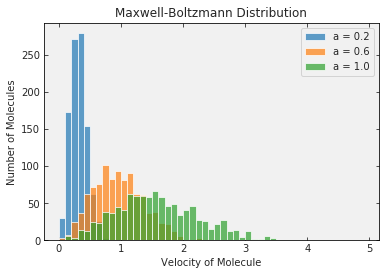

In [3]:
np.random.randn(123)
fig, ax = pl.subplots()
for a in [0.2, 0.6, 1.0]:
  ax.hist(sp.stats.maxwell.rvs(scale=a, size=1000), 
          bins=np.arange(0,5,0.1), alpha=0.7,
       label="a = %.1f"%a);
  
pl.legend();
ax.set_title("Maxwell-Boltzmann Distribution")
ax.set_xlabel("Velocity of Molecule");  # Set x axis label
ax.set_ylabel("Number of Molecules");   # Set y axis label

# 2) knowing that the *scale* parameter *a* is a function of the temperature  *T*, and that the dependency is to a power 1/2, which is correct: 
   **$a \propto \sqrt{T}$**  or **$a \propto \sqrt{1/T}$**? 
 

My answer:    **$a \propto \sqrt{T}$**, the scale factor and temperature are proportional, not **$inversely$** proportional.


# 3) What is the mean of all three distributions. How does it compare to the most probable molecular speed? 
From the wikipedia page of the Chi distribution find the formula of the mean of the Chi distribution. The distribution we are using has a scale parameter *a* in addition to the number of degrees of freedom. The mean scales linearly with this parameter:

$\mu_{\mathrm{MB}, k, a} = a \cdot \mu_{\mathrm{chi}, k}$

*Using the scipy function ```sp.special.gamma()```  calculate the gamma $\Gamma$ function,

**calculate the mean of all three distributions. How does it compare to the most probable molecular speed.**

In [4]:
np.random.seed(123)
for a in [0.2, 0.6, 1.0]:
    distr = sp.stats.maxwell.rvs(scale=a, size=1000)
    print("For a scale factor",a)
    print("The mean speed is",round(distr.mean(),3))
    
    # This script counts the number of values within each bin to find the mode
    binSize = 0.1

    actualMode = 0
    guessMode = binSize/2
    maxCount = 0
    while(guessMode < max(distr)):
        count = 0
        for i in distr:
            if (i >= guessMode - binSize/2) & (i < guessMode + binSize/2):
                count += 1
        if count > maxCount:
            maxCount = count
            actualMode = guessMode
        guessMode += binSize
    
    print("The most probable speed is",round(actualMode,3),"     ",round(maxCount,3))
    print("The gamma function is",round(sp.special.gamma(a),3))
    print("---------------------------------------------")

For a scale factor 0.2
The mean speed is 0.323
The most probable speed is 0.25       275
The gamma function is 4.591
---------------------------------------------
For a scale factor 0.6
The mean speed is 0.956
The most probable speed is 0.95       110
The gamma function is 1.489
---------------------------------------------
For a scale factor 1.0
The mean speed is 1.638
The most probable speed is 1.65       62
The gamma function is 1.0
---------------------------------------------


This really only holds for perfect gasses, which means under 4 assumptions: 
- the diameter of the molecules is much smaller than the distance between them
- the collisions between molecules conserve energy
- the molecules do not interact between collisions and are not subject to any other forces (move at constant speed in a straight line)
- the initial position and velocity are random.

# Extra Credit:

can you create a python (2D) simulation where the molecules behave as describe and calculate their speed evolution from an initial speed that is gaussian distributed? (rather hard!!)


In [0]:
# your code here